In [1]:
from glob import glob
import json

In [ ]:
results = {}
def get_results(book_id):
    if book_id not in results:
        results[book_id] = {}
    for filepath in glob('datasets/{}-0/default/evaluations/*.json'.format(book_id)):
        filenames = filepath.split('\\')[-1]
        print(filenames)
        if "iteration" in filenames:
            chapter_num, _, summary_type, _, iteration_num, _ = filenames.split('_')
        else:
            chapter_num, _, summary_type, _ = filenames.split('_')
            iteration_num = 0
        chapter_num = int(chapter_num)
        iteration_num = int(iteration_num)
        with open(filepath) as f:
            data = json.load(f)

        if summary_type not in results[book_id]:
            results[book_id][summary_type] = {}

        if chapter_num not in results[book_id][summary_type]:
            results[book_id][summary_type][chapter_num] = {}
        results[book_id][summary_type][chapter_num][iteration_num] = data
get_results(1342)
get_results(11)

10_summary_comprehensive_evaluation.json
10_summary_comprehensive_iteration_1_evaluation.json
10_summary_comprehensive_iteration_2_evaluation.json
10_summary_concise_evaluation.json
10_summary_concise_iteration_1_evaluation.json
10_summary_concise_iteration_2_evaluation.json
10_summary_detailed_evaluation.json
10_summary_detailed_iteration_1_evaluation.json
10_summary_detailed_iteration_2_evaluation.json
11_summary_comprehensive_evaluation.json
11_summary_comprehensive_iteration_1_evaluation.json
11_summary_comprehensive_iteration_2_evaluation.json
11_summary_concise_evaluation.json
11_summary_concise_iteration_1_evaluation.json
11_summary_concise_iteration_2_evaluation.json
11_summary_detailed_evaluation.json
11_summary_detailed_iteration_1_evaluation.json
11_summary_detailed_iteration_2_evaluation.json
12_summary_comprehensive_evaluation.json
12_summary_comprehensive_iteration_1_evaluation.json
12_summary_comprehensive_iteration_2_evaluation.json
12_summary_concise_evaluation.json
12

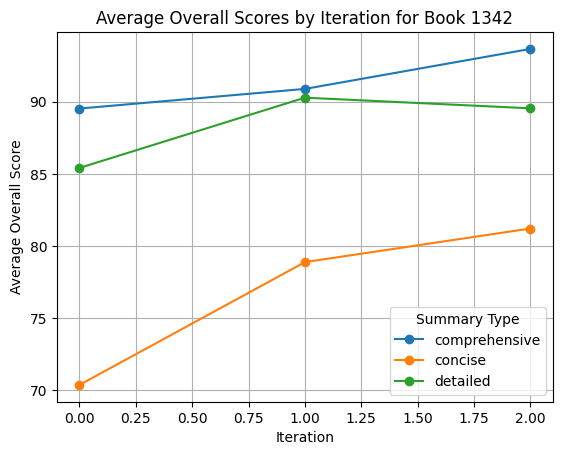

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_score_by_iteration(results, book_id):
    summary_types = results[book_id].keys()

    # Prepare data for plotting
    iteration_scores = {}
    for summary_type in summary_types:
        iteration_scores[summary_type] = {}
        for chapter_num in results[book_id][summary_type]:
            for iteration_num in results[book_id][summary_type][chapter_num]:
                score = results[book_id][summary_type][chapter_num][iteration_num]['overall_score']
                if iteration_num not in iteration_scores[summary_type]:
                    iteration_scores[summary_type][iteration_num] = []
                iteration_scores[summary_type][iteration_num].append(score)

    # Compute average scores by iteration for each summary type
    avg_scores = {summary_type: [] for summary_type in summary_types}
    iterations = sorted(next(iter(iteration_scores.values())).keys())
    for summary_type in summary_types:
        for iteration_num in iterations:
            avg_scores[summary_type].append(np.mean(iteration_scores[summary_type][iteration_num]))

    # Plot the data
    for summary_type in summary_types:
        plt.plot(iterations, avg_scores[summary_type], marker='o', label=summary_type)

    plt.title(f"Average Overall Scores by Iteration for Book {book_id}")
    plt.xlabel("Iteration")
    plt.ylabel("Average Overall Score")
    plt.legend(title="Summary Type")
    plt.grid(True)
    plt.show()

# Call the function for the specific book_id
plot_average_score_by_iteration(results, 1342)


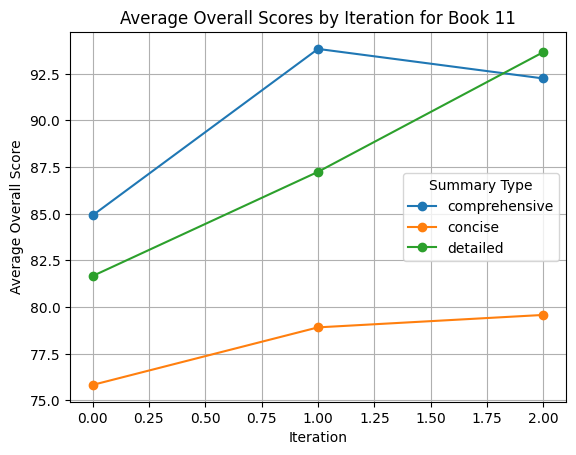

In [20]:
plot_average_score_by_iteration(results, 11)

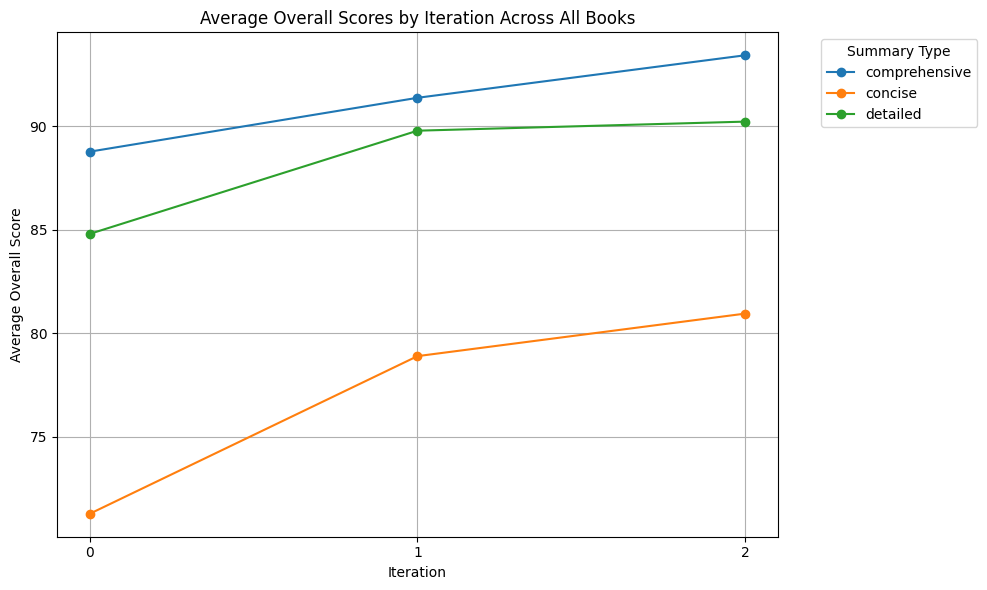

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_score_by_iteration_all_books(results, book_ids):
    # Prepare data for plotting
    iteration_scores = {}
    for book_id in book_ids:
        for summary_type in results[book_id].keys():
            if summary_type not in iteration_scores:
                iteration_scores[summary_type] = {}

            for chapter_num in results[book_id][summary_type]:
                for iteration_num in results[book_id][summary_type][chapter_num]:
                    score = results[book_id][summary_type][chapter_num][iteration_num]['overall_score']
                    if iteration_num not in iteration_scores[summary_type]:
                        iteration_scores[summary_type][iteration_num] = []
                    iteration_scores[summary_type][iteration_num].append(score)

    # Compute average scores by iteration for each summary type
    avg_scores = {summary_type: [] for summary_type in iteration_scores.keys()}
    iterations = sorted(set(iter_num for scores in iteration_scores.values() for iter_num in scores.keys()))
    for summary_type, scores in iteration_scores.items():
        for iteration_num in iterations:
            if iteration_num in scores:
                avg_scores[summary_type].append(np.mean(scores[iteration_num]))
            else:
                avg_scores[summary_type].append(np.nan)  # Handle missing iterations

    # Plot the data
    plt.figure(figsize=(10, 6))
    for summary_type, scores in avg_scores.items():
        plt.plot(iterations, scores, marker='o', label=summary_type)

    plt.title("Average Overall Scores by Iteration Across All Books")
    plt.xlabel("Iteration")
    plt.ylabel("Average Overall Score")
    plt.xticks(ticks=iterations)  # Ensure x-axis shows only integers
    plt.legend(title="Summary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function for the specific book_ids
plot_average_score_by_iteration_all_books(results, [1342, 11])


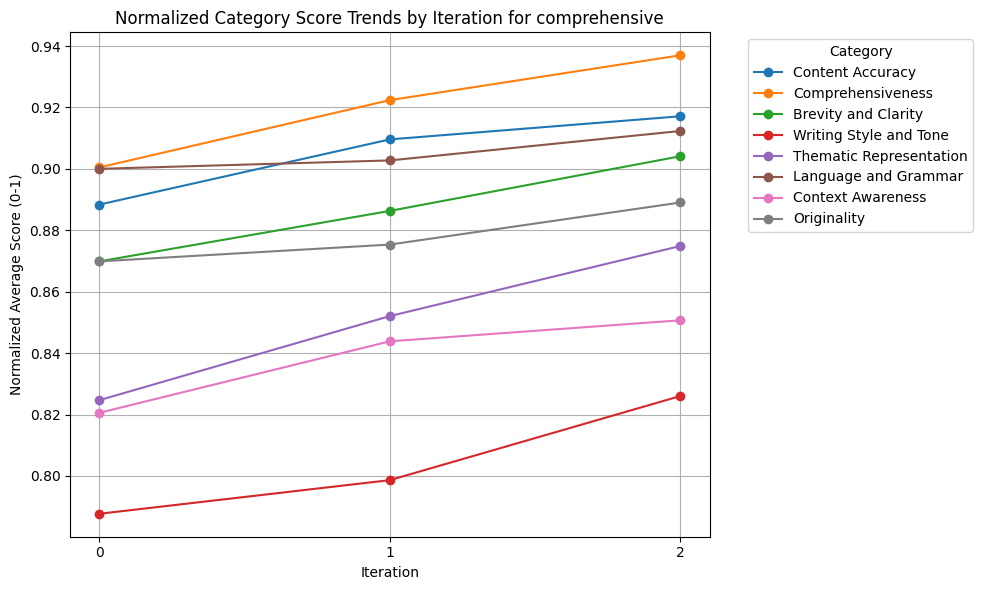

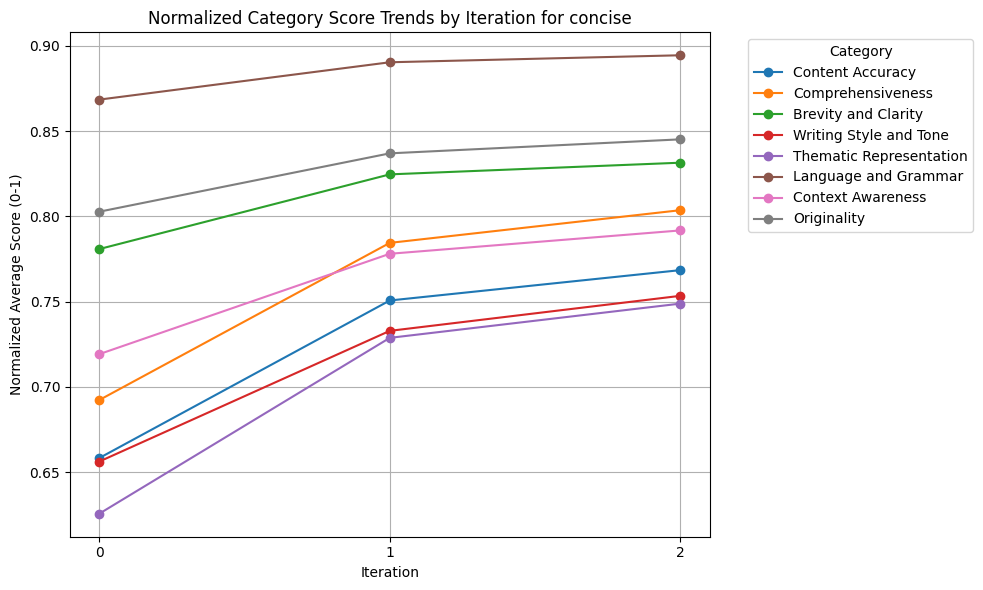

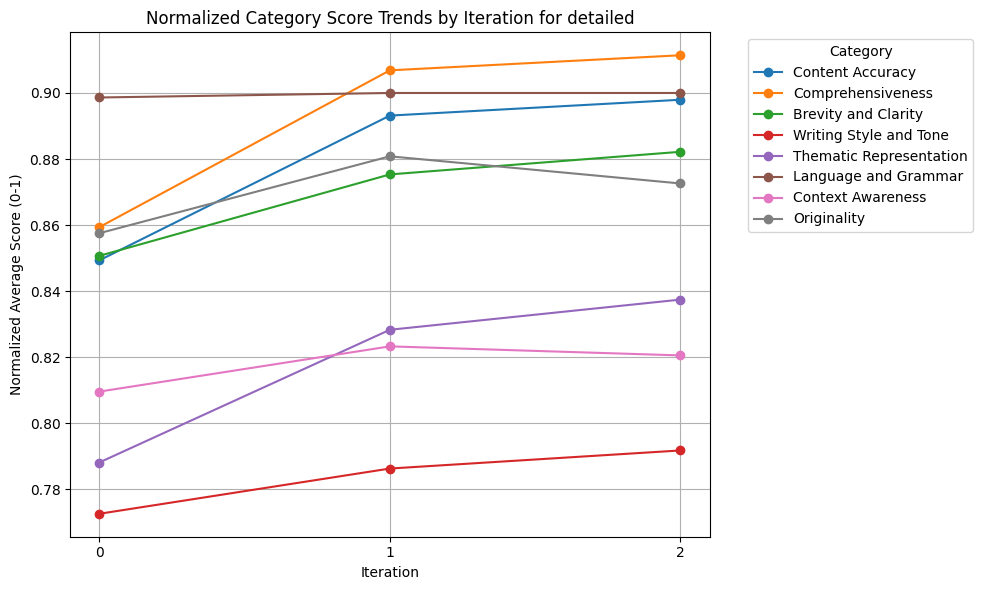

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_category_score_trends_normalized(results, book_ids):
    # Prepare data for plotting
    category_scores = {}
    for book_id in book_ids:
        for summary_type in results[book_id].keys():
            if summary_type not in category_scores:
                category_scores[summary_type] = {}

            for chapter_num in results[book_id][summary_type]:
                for iteration_num in results[book_id][summary_type][chapter_num]:
                    categories = results[book_id][summary_type][chapter_num][iteration_num]["category_scores"]
                    for category, score in categories.items():
                        if category not in category_scores[summary_type]:
                            category_scores[summary_type][category] = {}
                        if iteration_num not in category_scores[summary_type][category]:
                            category_scores[summary_type][category][iteration_num] = []
                        category_scores[summary_type][category][iteration_num].append(score)

    # Define the maximum possible score for each category
    category_max_scores = {
        "Content Accuracy": 20,
        "Comprehensiveness": 15,
        "Brevity and Clarity": 10,
        "Writing Style and Tone": 10,
        "Thematic Representation": 15,
        "Language and Grammar": 10,
        "Context Awareness": 10,
        "Originality": 10
    }

    # Compute normalized average scores by iteration for each category and summary type
    avg_category_scores = {summary_type: {} for summary_type in category_scores.keys()}
    iterations = sorted(set(iter_num for scores in category_scores.values() for cat_scores in scores.values() for iter_num in cat_scores.keys()))
    for summary_type, categories in category_scores.items():
        for category, scores in categories.items():
            avg_category_scores[summary_type][category] = []
            for iteration_num in iterations:
                if iteration_num in scores:
                    avg_score = np.mean(scores[iteration_num]) / category_max_scores[category]  # Normalize the score
                    avg_category_scores[summary_type][category].append(avg_score)
                else:
                    avg_category_scores[summary_type][category].append(np.nan)  # Handle missing iterations

    # Plot the data
    for summary_type, categories in avg_category_scores.items():
        plt.figure(figsize=(10, 6))
        for category, scores in categories.items():
            plt.plot(iterations, scores, marker='o', label=category)

        plt.title(f"Normalized Category Score Trends by Iteration for {summary_type}")
        plt.xlabel("Iteration")
        plt.ylabel("Normalized Average Score (0-1)")
        plt.xticks(ticks=iterations)  # Ensure x-axis shows only integers
        plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Call the function for the specific book_ids
plot_category_score_trends_normalized(results, [1342, 11])
